<a href="https://colab.research.google.com/github/Jorgecuenca1/Vision-computadora-I/blob/main/Tp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def image(image):
    imagen = cv.imread(image)
  
    imgRGB = cv.cvtColor(imagen,cv.COLOR_BGR2RGB)
    # Muestro la imagen color
    #plt.imshow(imgRGB)
    #plt.show()
    return imgRGB

In [4]:
def image_coord_crom(imgRGB):

   
    
    im_r, im_g, im_b = cv.split(imgRGB)

  
    den = im_r.astype('uint16') + im_g.astype('uint16') + im_b.astype('uint16') + 0.001 #Evita división por cero

    im_r_new = im_r / den
    im_g_new = im_g / den
    im_b_new = im_b / den

    
    imgRGB_new = cv.merge((im_r_new,im_g_new,im_b_new))


    return imgRGB_new
    

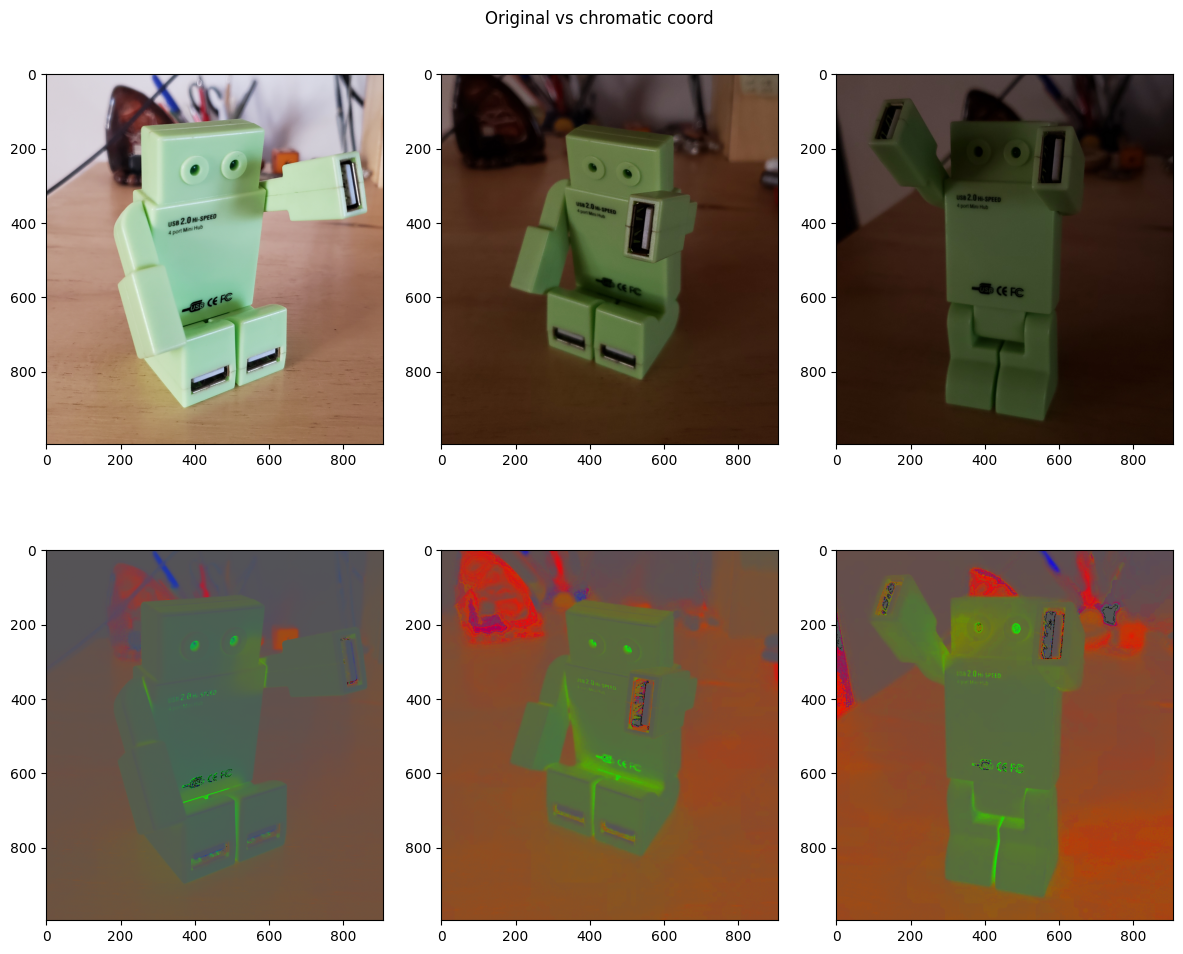

In [7]:
imgRGB_1 = image('/content/CoordCrom_1.png')
imgRGB_2 = image('/content/CoordCrom_2.png')
imgRGB_3 = image('/content/CoordCrom_3.png')
imgRGB_new_1 = image_coord_crom(imgRGB_1)
imgRGB_new_2 = image_coord_crom(imgRGB_2)
imgRGB_new_3 = image_coord_crom(imgRGB_3)
fig, axs = plt.subplots(2, 3, figsize=(12,10))
fig.suptitle('Original vs chromatic coord')
fig.tight_layout() 

axs[0,0].imshow(imgRGB_1)
axs[0,1].imshow(imgRGB_2)
axs[0,2].imshow(imgRGB_3)
axs[1,0].imshow(imgRGB_new_1)
axs[1,1].imshow(imgRGB_new_2)
axs[1,2].imshow(imgRGB_new_3)

In [9]:
def image_white_patch(img, perc):
    #Split into RGB components
    im_r, im_g, im_b = cv.split(img)

    #Calculate percentiles, if 100, then took max value
    max_r = np.percentile(im_r, perc)
    max_g = np.percentile(im_g, perc)
    max_b = np.percentile(im_b, perc)

    #Apply white patch algorithm
    im_r_new = np.clip( (255 / max_r) * im_r, 0, 255).astype('uint8')
    im_g_new = np.clip( (255 / max_g) * im_g, 0, 255).astype('uint8')
    im_b_new = np.clip( (255 / max_b) * im_b, 0, 255).astype('uint8')

    #Merge into a new image
    imgRGB_new = cv.merge((im_r_new,im_g_new,im_b_new))

    #Show it
    #plt.imshow(imgRGB_new)
    #plt.show()

    return imgRGB_new
imgWP_1 = image('/content/wp_blue.jpg')
imgWP_2 = image('/content/wp_green.png')
imgWP_3 = image('/content/wp_red.png')

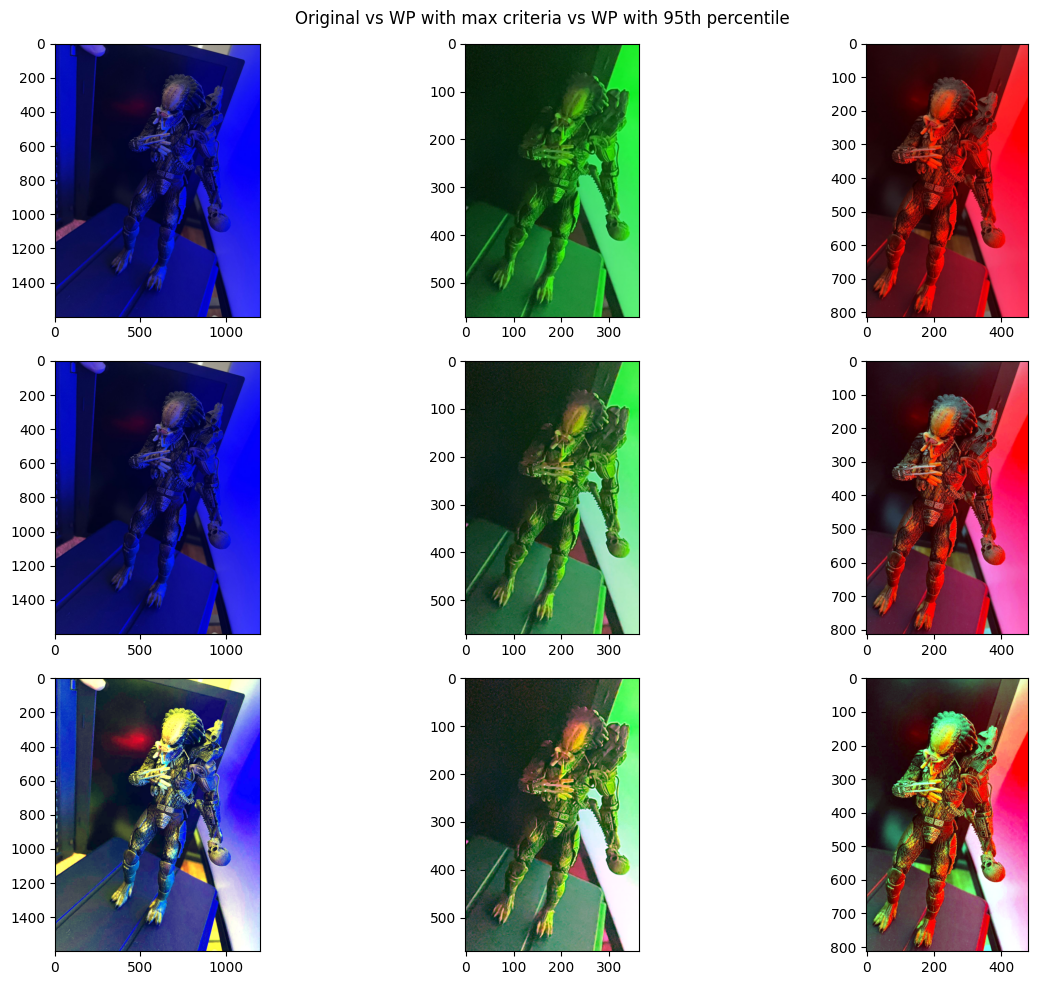

In [10]:
imgWP_new_1_100 = image_white_patch(imgWP_1, 100)
imgWP_new_2_100 = image_white_patch(imgWP_2, 100)
imgWP_new_3_100 = image_white_patch(imgWP_3, 100)
imgWP_new_1_95 = image_white_patch(imgWP_1, 95)
imgWP_new_2_95 = image_white_patch(imgWP_2, 95)
imgWP_new_3_95 = image_white_patch(imgWP_3, 95)
fig, axs = plt.subplots(3, 3, figsize=(12,10))
fig.suptitle('Original vs WP with max criteria vs WP with 95th percentile')
fig.tight_layout() 

axs[0,0].imshow(imgWP_1)
axs[0,1].imshow(imgWP_2)
axs[0,2].imshow(imgWP_3)
axs[1,0].imshow(imgWP_new_1_100)
axs[1,1].imshow(imgWP_new_2_100)
axs[1,2].imshow(imgWP_new_3_100)
axs[2,0].imshow(imgWP_new_1_95)
axs[2,1].imshow(imgWP_new_2_95)
axs[2,2].imshow(imgWP_new_3_95)

**Parte 2:**
1. Para las imágenes img1_lp.png y img2_lp.png leerlas con OpenCV en escala de grises y visualizarla.

(([], []), ([], []))

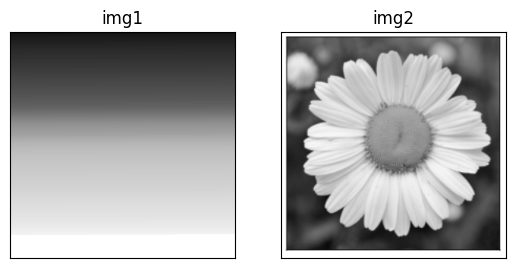

In [11]:
img1 = cv.imread('/content/img1_tp.png', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('/content/img2_tp.png', cv.IMREAD_GRAYSCALE)

# Visualizar las imágenes
plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title('img1')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(img2, cmap='gray')
plt.title('img2')
plt.xticks([]), plt.yticks([])

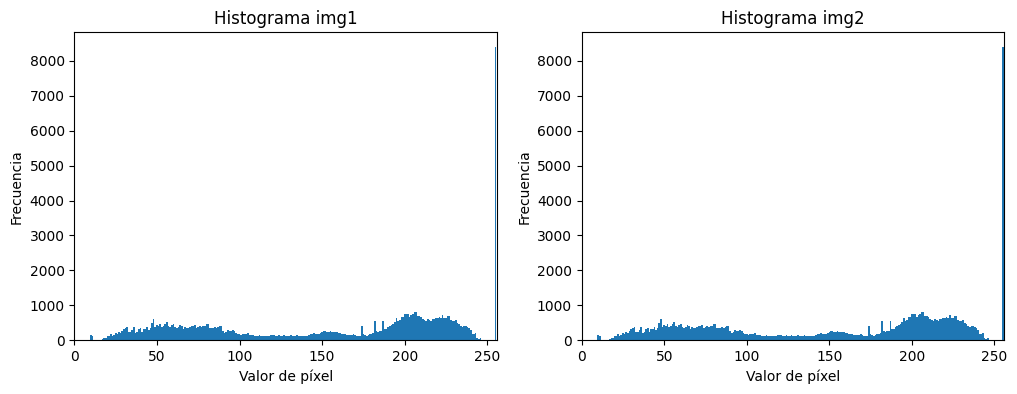

In [12]:


# Definir el número de bins para el histograma
num_bins = 256

# Calcular los histogramas de ambas imágenes
hist1, bins1 = np.histogram(img1, bins=num_bins, range=[0, 256])
hist2, bins2 = np.histogram(img2, bins=num_bins, range=[0, 256])

# Visualizar los histogramas
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.bar(bins1[:-1], hist1, width=1)
plt.xlim([0, 256])
plt.title('Histograma img1')
plt.xlabel('Valor de píxel')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.bar(bins2[:-1], hist2, width=1)
plt.xlim([0, 256])
plt.title('Histograma img2')
plt.xlabel('Valor de píxel')
plt.ylabel('Frecuencia')

plt.show()

En el código anterior, hemos calculado y visualizado los histogramas de dos imágenes en escala de grises. Los histogramas muestran la distribución de los valores de píxeles en una imagen y pueden ser útiles para comprender mejor el contenido de la imagen.

En los histogramas, el eje x representa los valores de los píxeles y el eje y representa la frecuencia con la que aparecen esos valores de píxeles en la imagen. Por lo tanto, se puede observar en los histogramas cómo se distribuyen los valores de píxeles en ambas imágenes.

Si se quisiera crear un modelo de clasificación o detección de imágenes, los histogramas podrían ser una característica útil para considerar. En particular, los histogramas pueden ser útiles para detectar patrones comunes en las imágenes o para diferenciar entre diferentes tipos de imágenes.

Por ejemplo, si se quisiera crear un modelo para detectar objetos en imágenes, se podría utilizar el histograma como una característica para distinguir entre diferentes tipos de objetos. Si los objetos en cuestión son rojos, por ejemplo, se podría utilizar el histograma para identificar los valores de píxeles rojos y utilizarlos como característica para detectar los objetos.

En resumen, los histogramas pueden ser una característica útil para considerar en un modelo de clasificación o detección de imágenes, dependiendo de los objetivos específicos del modelo y del contenido de las imágenes.

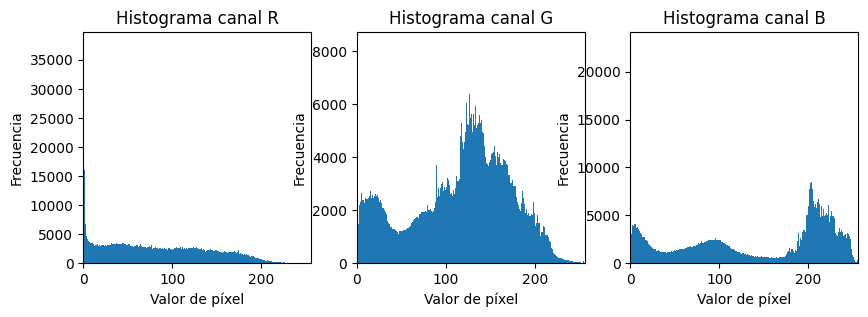

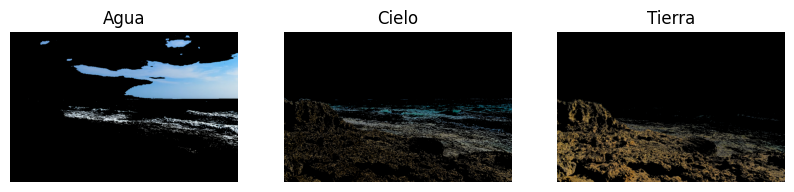

In [13]:
img = cv.imread('/content/segmentacion.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Calcular los histogramas de los canales RGB
hist_r, bins_r = np.histogram(img[:,:,0], bins=256, range=[0, 256])
hist_g, bins_g = np.histogram(img[:,:,1], bins=256, range=[0, 256])
hist_b, bins_b = np.histogram(img[:,:,2], bins=256, range=[0, 256])

# Visualizar los histogramas
plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
plt.bar(bins_r[:-1], hist_r, width=1)
plt.xlim([0, 256])
plt.title('Histograma canal R')
plt.xlabel('Valor de píxel')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 2)
plt.bar(bins_g[:-1], hist_g, width=1)
plt.xlim([0, 256])
plt.title('Histograma canal G')
plt.xlabel('Valor de píxel')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 3)
plt.bar(bins_b[:-1], hist_b, width=1)
plt.xlim([0, 256])
plt.title('Histograma canal B')
plt.xlabel('Valor de píxel')
plt.ylabel('Frecuencia')

plt.show()

# Segmentar la imagen en tres regiones (agua, cielo y tierra)
# Definir los límites para cada región (en valores RGB)
lower_blue = np.array([100, 150, 200])
upper_blue = np.array([255, 255, 255])

lower_green = np.array([0, 100, 0])
upper_green = np.array([150, 255, 150])

lower_brown = np.array([50, 50, 0])
upper_brown = np.array([200, 200, 100])

# Crear las máscaras para cada región
mask_blue = cv.inRange(img, lower_blue, upper_blue)
mask_green = cv.inRange(img, lower_green, upper_green)
mask_brown = cv.inRange(img, lower_brown, upper_brown)

# Aplicar las máscaras a la imagen original
blue_pixels = cv.bitwise_and(img, img, mask=mask_blue)
green_pixels = cv.bitwise_and(img, img, mask=mask_green)
brown_pixels = cv.bitwise_and(img, img, mask=mask_brown)

# Visualizar las imágenes segmentadas
plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
plt.imshow(blue_pixels)
plt.title('Agua')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(green_pixels)
plt.title('Cielo')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(brown_pixels)
plt.title('Tierra')
plt.axis('off')

plt.show()